# TP - Séparation de composantes (ACP/EOF)

L'objectf de ce TP est d'introduire l'Analyse en Composantes Principales (ACP), connue en géosciences sour le nom de "Empirical Orthogonal Functions" (EOF).

On commencera par appliquer l'ACP en utilisant Numpy/Scipy sur des données jouets pour comprendre son fonctionnement puis on utilisera la bibliothèque Scikit Learn pour appliquer l'ACP sur des données de simulation de SSH pour analyser ces données.

# I) ACP sur un problème purement linéaire

Ici, on reprend l'exemple du système poids-ressort de la vidéo et on simule l'acquisition de la position par des caméras placées autour du système.

https://www.youtube.com/watch?v=a9jdQGybYmE

On commence par simuler les données. On suppose que les images acquises par les caméras ont permis de détecter les coordonnées du centre de gravité de la masse. On a donc un couple de coordonnées qui évolue au cours du temps pour chaque caméra.

Dans le repère orthonormé direct usuel où la verticale est le troisième axe, les coordonnées du système au cours du temps sont données par:

$\mathbf{\gamma}(t) = \left[ 0,0, z(t)\right]^T \in \mathbb{R}^{3}$ où $z(t) = A \cos (\omega t + \phi)$

On peut rassembler ces coordonnées au cours du temps dans une matrice $\mathbf{X} \in \mathbb{R}^{3\times n}$, où $n$ est le nombre d'échantillons temporels.

Pour trouver les coordonnées dans les plans des caméras, il faut projeter ces coordonnées dans chacun des plans.

Par exemple, si le plan de la première caméra a pour vecteurs de base $\mathbf{a}_1$ et $\mathbf{b}_1 \in \mathbb{R}^{3}$ (orthogonaux en général pour une caméra mais pas forcément dans ce qui va suivre), alors pour trouve les coordonnées $\mathbf{y}_1 \in \mathbb{R}^2$ de la masse dans ce plan, on doit calculer:

\begin{equation}
\mathbf{y}_1 = (\mathbf{M}_1^T\mathbf{M}_1)^{-1}\mathbf{M}_1^{T}\mathbf{x} = \mathbf{P}_{1}\mathbf{x}
\end{equation}

où $\mathbf{M}_1 = \left[\mathbf{a}_1,\mathbf{b}_1\right]^T \in \mathbb{R}^{2\times 3} $ et $\mathbf{P}_1 \in \mathbb{R}^{2\times 3} $

En écrivant une relation de ce type pour chaque caméra on obtient donc
$\mathbf{Y} = \mathbf{PX}$

avec $\mathbf{P} = \left[ \mathbf{P}_{1}^T, \mathbf{P}_2^{T}, \mathbf{P}_{3}^{T} \right]^T \in \mathbb{R}^{6\times 3}$


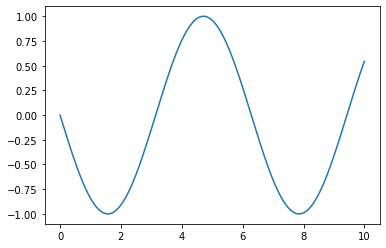

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

A = 1 # amplitude of the oscillations
m = 1 # mass of the object
k = 1 # stiffness of the spring
phi = np.pi/2 # phase

w = np.sqrt(m/k) # frequency of the oscillations

n = 1000 # number of time samples
t = np.linspace(0,10,n)

# mass-spring 

z = A*np.cos(w*t + phi)

plt.figure
plt.plot(t,z)



1) Simuler un jeu de données en 3 dimensions en utilisant la composante $z$ générée ci-dessus. Le représenter via un scatterplot en 3 dimensions.

2) Générer des données en 6 dimensions en projetant les données de la question 1 sur trois plans (vecteurs de base au choix) en utilisant les formules ci-dessus. Représenter les données dans chacun des plans via des scatterplots.


In [0]:
X = ...


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
...


3) Calculer la matrice de covariance des données. Comparer avec la matrice de covariance théorique. Puis effectuer sa décomposition en valeurs et vecteurs propres. Représenter les valeurs propres par ordre décroissant. Commenter.

4) Calculer la projection des données sur le premier axe propre, visualiser ces projections et interpréter. 

Aide: l'ACP permet d'approximer un jeu de données $\mathbf{Y} \in \mathbb{R}^{p\times n }$ avec $p$ variables et $n$ échantillons par un produit de composantes principales expliquant le plus de variance et des coefficients associés, du type $\mathbf{UW}$, où $\mathbf{U} \in \mathbb{R}^{p \times k}$ contient les $k$ composantes principales retenues et $\mathbf{W}^{k \times n}$ contient les coefficients de la décomposition.

Pour retrouver les coefficients de la projection depuis les données, il suffit de calculer $\mathbf{W} = \mathbf{U}^T \mathbf{Y}$ (car $\mathbf{U}^{-1} = \mathbf{U}^{T}$).

En particulier, pour la projection des points de données sur la composante $k$, il suffit de calculer $\mathbf{w}_{k} = \mathbf{Y}^T\mathbf{u}_{k} \in \mathbb{R}^{n} $, où $\mathbf{u}_{k}$ est la $k^{eme}$ colonne de $\mathbf{U}$. 


In [0]:
# Do PCA on the dataset

C = ...

C_th = ..



5) Refaire le même exercice dans les deux cas suivants:

i) Avec des données $\mathbf{Y}$ bruitées (ajouter un bruit gaussien de covariance diagonale $\sim \mathcal{N}(\mathbf{0},\sigma^2 \mathbf{I}_{p})$ à chaque point de données, en testant différentes valeurs pour le rapport signal à bruit)

ii) Avec un système physique différent: mouvement d'un pendule simple dans un plan vertical.

# II) ACP sur un problème non linéaire

Maintenant on applique l'ACP sur un jeu de données jouet qui consiste en de nombreuses rotations d'une image de base avec différents angles.

L'image de base est une image en niveaux de gris représentant le chiffre 3. On utilise un algorithme pour tourner l'image avec $n$ rotations couvrant l'ensemble des angles possibles (de 0° à 360°). Chaque image est de taille $61\times 61$, et les données vivent donc dans $\mathbb{R}^{3721}$.

In [3]:
import scipy.io as sio
import scipy as sp
import skimage 

# from google.colab import drive

import os
print(os.getcwd())

drive.mount("/content/gdrive/")

!ls "/content/gdrive/My Drive/DS1/Classes inversées/Classe inversée 2: Séparation de processus géophysiques/Données/"

path = "/content/gdrive/My Drive/DS1/Classes inversées/Classe inversée 2: Séparation de processus géophysiques/Données/image3.mat"



/home/administrateur/Documents/cours/isblue/classes_inversées/PCA_EOF/lab


NameError: name 'drive' is not defined

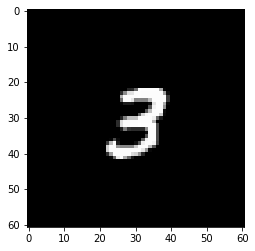

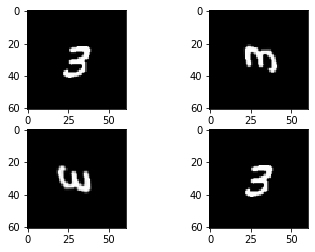

In [0]:
data = sio.loadmat(path)

im = data['image3']

m,n = im.shape

plt.figure
plt.imshow(im, cmap ='gray')

nb_images = 100;

theta = np.linspace(0,360,nb_images)

images = np.zeros((m,n,nb_images))

for i in range(nb_images):
    images[:,:,i] = skimage.transform.rotate(im,theta[i])


plt.figure()
plt.subplot(221)
plt.imshow(images[:,:,0], cmap ='gray')
plt.subplot(222)
plt.imshow(images[:,:,25], cmap ='gray')
plt.subplot(223)
plt.imshow(images[:,:,75], cmap ='gray')
plt.subplot(224)
plt.imshow(images[:,:,99], cmap ='gray')


1) Visualiser et interpréter la matrice de covariance de ce jeu de données en traitant chaque pixel comme une caractéristique et les différentes rotations comme les échantillons.

In [0]:
from sklearn.decomposition import PCA

# reshape data
im = ...

# visualize covariance matrix

cov = ...

2) Appliquer l'ACP à ces données en utilisant le package scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Visualiser d'abord toutes les valeurs propres comme auparavant, ainsi que la variance totale expliquée en fonction du nombre de composantes. Puis visualiser les 16 premières composantes principales sous la forme d'images ainsi que les coefficients associés pour une image au hasard.

3) Ajouter du bruit aux données (SNR = 10 dB par exemple) et refaire la décomposition. Regarder en particulier les dernières composantes et commenter.


In [0]:
# Compute the PCA


3) Visualiser la reconstruction d'un échantillon au hasard en utilisant 3,16 et 50 composantes. Commenter la qualité de la reconstruction.

In [0]:
# Reconstruct samples


4) Visualiser les données en 2 et 3D de deux façons:

i) En utilisant les projections sur des vecteurs de la base canonique de $\mathbb{R}^{3721}$
ii) En utilisant les projections sur les premières composantes principales.

Comparer.

Conclure sur la dimension intrinsèque des données et l'utilité/la capacité de l'ACP à expliquer ces données.

In [0]:
# Last thing: use first 3 principal components to show a scatterplot of the
# data and compare to a visualization using 3 vectors of the original basis


# III) ACP sur un jeu de données de SSH simulé

Dans cette dernière partie, on va appliquer l'ACP à des données simulées de température de l'océan (Sea Surface Height, SSH), pour la zone du Golfe du Mexique.

Les données consistent en des simulation d'un modèle dynamique pour cette zone sur une période de 7 ans, avec 50 conditions initiales différentes. Pour chaque membre, les données consistent en une série temporelles d'images d'environ 70x80 pixels.

Les données sont volumineuses et difficiles à analyser telles quelles. C'est pourquoi on utilise l'ACP/EOF pour réduire la dimensionalité des données et isoler des modes de variation représentatifs du comportement du système.


In [0]:
import pickle
import os

dirDATA = "/content/gdrive/My Drive/data_dsg/" # first you need to add the directory to your own drive

genFilename = 'GOM025.GSL301_m0'
genSuffix   = '_1d_dtrend.nc'
NbFile      = 50
# NbRandDates = 500  # number of random dates selected for each member for PCA and autoencoding

NbRandDates = 100  # number of random dates selected for each member for PCA and autoencoding

SelectedField = 'ssht'
    
plt.rcParams['figure.figsize'] = [12, 7] 
# plt.rcParams['figure.figsize'] = [24,14] 
    
    
latBounds = [17,32]
lonBounds = [-99,-79]

In [0]:
# test for reading a given member (so one time series of images)

filename = dirDATA+genFilename+'03'+genSuffix+'ROI.pkl' # member #3

# useful variables to load 

filehandler = open(filename, 'rb') 
SelectedField = pickle.load(filehandler) # type of field selected (here SSH -- SLA actually)
latBounds = pickle.load(filehandler)
lonBounds = pickle.load(filehandler) 
indNoNaN = pickle.load(filehandler) # indices of the land pixels
indlat = pickle.load(filehandler) # latitudes
indlon = pickle.load(filehandler) # longitudes

flagRemoveHF = pickle.load(filehandler)
flagRemoveMean = pickle.load(filehandler)
sigmaFilt = pickle.load(filehandler)

sstROI = pickle.load(filehandler)
sshROI = sstROI # In python this is just copying a reference to the object
    
print('.... reading file %s'%(filename))     

1) Visualiser les données en prenant différents membres et les images à différents instants temporels.

In [0]:
...


In [ ]:
# Plotting the whole time series

# Importing ipywidgets for interactive plotting
from ipywidgets import *
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D


def plt_ssh(t):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax.set_title(r"SSH data at t = {:.2f}".format(t),fontsize=15)
    ax.set_ylabel(r"SSH", fontsize=20)
    imgplot = plt.imshow(sshROI[t,:,:],extent=(lonBounds[0],lonBounds[1],latBounds[0],latBounds[1]),vmin = -.1, vmax = 0.1)
    imgplot.set_cmap('jet')
    plt.colorbar(fraction=0.04, pad=0.04)
    plt.show()


# interactive plot u(x,y,t) for varying t
interact(plt_ssh, t=(0,2300,1))

L'objectif est de pouvoir représenter chacun des membres sur une base de projection commune. Ici les données vivent dans $\mathbb{R}^n$, où $n$ est le nombre de pixels de chaque image. Les échantillons sont donnés par les différents échantillons temporels. Pour avoir une représentation commune, il suffit de concaténer des échantillons de chaque membre pour avoir une représentation qui explique tous les membres en moyenne.


In [0]:
# Prepare the data for analysis

# Concatenate all members (with some random indices because otherwise the matrix gets too big) to get the principal components

from scipy import ndimage
sigmaFilt    = 10
flagRemoveHF = 1

for kk in range(1,NbFile):
    
 
    filename = dirDATA+genFilename+"0%d"%(kk)+genSuffix+'ROI.pkl'
    
    if not(os.path.isfile(filename)):
        kk = kk + 1
        continue
    
    filehandler = open(filename, 'rb')

    
    
    SelectedField = pickle.load(filehandler)
    latBounds = pickle.load(filehandler)
    lonBounds = pickle.load(filehandler)
    indNoNaN = pickle.load(filehandler)
    indlat = pickle.load(filehandler)
    indlon = pickle.load(filehandler)

    flagRemoveHF = pickle.load(filehandler)
    flagRemoveMean = pickle.load(filehandler)
    sigmaFilt = pickle.load(filehandler)

    sstROI = pickle.load(filehandler)
    sshROI = sstROI # In python this is just copying a reference to the object
    

        
    NbSSTDates = sstROI.shape[0]
    indRand    = np.random.permutation(NbSSTDates)[0:NbRandDates] # choose a certain number of random indices in the time series

    sshROI_small = sshROI[indRand,:,:]
    
    ## concatenate SST data
    if kk == 2:
        sstAllROI = sshROI_small.copy()
    else:
        sstAllROI = np.concatenate((sstAllROI,sshROI_small),axis=0)

    print('.... reading file %s - shape = %d %d %d'%(filename,sstAllROI.shape[0],sstAllROI.shape[1],sstAllROI.shape[2]))

.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m002_1d_dtrend.ncROI.pkl - shape = 100 67 77
.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m003_1d_dtrend.ncROI.pkl - shape = 200 67 77
.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m004_1d_dtrend.ncROI.pkl - shape = 300 67 77
.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m005_1d_dtrend.ncROI.pkl - shape = 400 67 77
.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m006_1d_dtrend.ncROI.pkl - shape = 500 67 77
.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m007_1d_dtrend.ncROI.pkl - shape = 600 67 77
.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m008_1d_dtrend.ncROI.pkl - shape = 700 67 77
.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m009_1d_dtrend.ncROI.pkl - shape = 800 67 77
.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m0010_1d_dtrend.ncROI.pkl - shape = 900 67 77


2) Comme auparavant, calculer et visualiser la matrice de covariance du jeu de données ainsi créé. En particulier, il est possible de regarder comment un pixel est corrélé aux autres en représentant une ligne ou colonne de la matrice de covariance sous la forme d'une image (attention à la gestion des pixels de terre qui ont pour valeur NaN).

In [0]:
# visualize correlation matrix 


# display one row of this matrix as an image


3)Calculer l'ACP sur ce jeu de données (attention aux NaN!). Visualiser la variance expliquée par les différentes composantes, et le composantes elles mêmes vues comme des images. Commenter en particulier l'allure des 50 premières et des dernières.

In [0]:
# PCA

# PCA parameters
NbPCA    = 3483 # number of principal components
pca      = PCA(NbPCA)

#  we perform a PCA in the space domain: observations are different times, and variables are space coordinates 



# format daily SST maps as vectors (remove NaN) (display three way array as a 2d array)

#  remove time series for grid points where the there is no initial value (mainly removes land)



# normalize data

sshAllROI_vec_no_nan_centered = sshAllROI_vec_no_nan-np.mean(sshAllROI_vec_no_nan,axis = 0)


maxi = np.amax(sshAllROI_vec_no_nan)
mini = np.amin(sshAllROI_vec_no_nan)

sshAllROI_normalized = (sshAllROI_vec_no_nan - mini)/(maxi-mini)




In [0]:
# visualize PCs and associated projection


4) Projeter une série temporelle correspondant à un membre sur la base de l'ACP et visualiser les projections et les composantes principales correspondantes (ainsi que la moyenne des données). Visualiser la trajectoire du système sous la forme d'un scatterplot en utilisant les trois premières composantes.

In [0]:
# Apply PCA to a given member

file_used = 10 
    
filename = dirDATA+genFilename+'0'+str(file_used)+genSuffix+'ROI.pkl' # first member
    
    
filehandler = open(filename, 'rb')

    
    
SelectedField = pickle.load(filehandler)
latBounds = pickle.load(filehandler)
lonBounds = pickle.load(filehandler)
indNoNaN = pickle.load(filehandler)
indlat = pickle.load(filehandler)
indlon = pickle.load(filehandler)

flagRemoveHF = pickle.load(filehandler)
flagRemoveMean = pickle.load(filehandler)
sigmaFilt = pickle.load(filehandler)

sstROI = pickle.load(filehandler)
sshROI = sstROI # In python this is just copying a reference to the object
    
sshROI_vec = np.reshape(sshROI,(sshROI.shape[0],sshROI.shape[1]*sshROI.shape[2]))   
    
sshROI_vec_no_nan  = sshROI_vec[:,indNoNaN[0]]

...


6) Faire la même chose pour tous les membres et les comparer

In [0]:
## apply PCA to all members

count = 0

for kk in range(2,NbFile):   
    if kk < 10:
        filename = dirDATA+genFilename+"0%d"%(kk)+genSuffix+'ROI.pkl'
    else:
        filename = dirDATA+genFilename+"0%d"%(kk)+genSuffix+'ROI.pkl'
    
    print('.... reading file %s'%(filename)) 
    
    if not(os.path.isfile(filename)):
        kk = kk + 1
        continue
        
    filehandler = open(filename, 'rb')

    
    
    SelectedField = pickle.load(filehandler)
    latBounds = pickle.load(filehandler)
    lonBounds = pickle.load(filehandler)
    indNoNaN = pickle.load(filehandler)
    indlat = pickle.load(filehandler)
    indlon = pickle.load(filehandler)

    flagRemoveHF = pickle.load(filehandler)
    flagRemoveMean = pickle.load(filehandler)
    sigmaFilt = pickle.load(filehandler)

    sstROI = pickle.load(filehandler)
    sshROI = sstROI # In python this is just copying a reference to the object
    
    sshROI_vec = np.reshape(sshROI,(sshROI.shape[0],sshROI.shape[1]*sshROI.shape[2]))   
    
    sshROI_vec_no_nan  = sshROI_vec[:,indNoNaN[0]]

        # fit PCA
    if kk == 2:
        PC_coef = np.zeros((47,sshROI.shape[0],NbPCA))
        
    PC_coef[count,:,:] = pca.transform(sshROI_vec_no_nan)
    count = count +1


.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m002_1d_dtrend.ncROI.pkl
.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m003_1d_dtrend.ncROI.pkl
.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m004_1d_dtrend.ncROI.pkl
.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m005_1d_dtrend.ncROI.pkl
.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m006_1d_dtrend.ncROI.pkl
.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m007_1d_dtrend.ncROI.pkl
.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m008_1d_dtrend.ncROI.pkl
.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m009_1d_dtrend.ncROI.pkl
.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m0010_1d_dtrend.ncROI.pkl
.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m0011_1d_dtrend.ncROI.pkl
.... reading file /content/gdrive/My Drive/data_dsg/GOM025.GSL301_m0012_1d_dtrend.ncROI.

In [0]:
# visualize PCA coeffs 



6) Visualiser les trajectoires en 3D en prenant comme vecteurs de base des pixels choisis au hasard. Conclure.

In [0]:
# visualize PCA coeffs 
from mpl_toolkits.mplot3d import Axes3D


